## Fractional Zener

In [1]:
using RHEOS
include("plotmodel.jl");

In [2]:
FractionalZener


Model name: fraczener

Free parameters: cₐ, a, cᵦ, β, cᵧ and γ


                  ______╱╲__________╱╲______
                 |      ╲╱          ╲╱      |
          _______|      cₐ,a         cᵦ, β  |_______
                 |                          |
                 |____________╱╲____________|
                              ╲╱
                              cᵧ, γ
                     

### Constitutive equation
$\sigma(t) + \frac{c_\alpha}{c_\beta} \frac{d^{\alpha-\beta} \sigma(t)}{dt^{\alpha-\beta}}= c_{\alpha} \frac{d^\alpha \epsilon(t)}{dt^\alpha} + c_\gamma \frac{d^\gamma \epsilon(t)}{dt^\gamma}+ \frac{c_\alpha c_\gamma}{c_\beta}\frac{d^{\alpha+\gamma-\beta} \epsilon(t)}{dt^{\alpha+\gamma-\beta}}$

Assuming $0 \leq \beta \leq \alpha \leq 1$

### Relaxation modulus
$G(t) = c_\beta t^{-\beta} E_{\alpha-\beta,1-\beta}\left(-\frac{c_\beta}{c_\alpha} t^{\alpha-\beta}\right) + \frac{c_{\gamma} }{\Gamma(1-\gamma)} t^{-\gamma}$ 

### Creep modulus
$J(s)= \frac{1}{s}\frac{c_\alpha s^{\alpha}+c_\beta s^{\beta}}{c_\alpha s^\alpha c_\beta s^{\beta} + c_\gamma s^\gamma (c_\alpha s^\alpha+c_\beta s^\beta)} $ 

### Storage modulus
$ G^{\prime}(\omega) = \frac{\left(c_\beta \omega^\beta\right)^2 \cdot c_\alpha \omega^\alpha \cos(\alpha \frac{\pi}{2}) + \left(c_\alpha \omega^\alpha\right)^2 \cdot c_\beta \omega^\beta \cos(\beta \frac{\pi}{2})}{\left(c_\alpha \omega^\alpha\right)^2+\left(c_\beta \omega^\beta\right)^2+2c_\alpha \omega^\alpha \cdot c_\beta \omega^\beta \cos((\alpha-\beta)\frac{\pi}{2})} + c_\gamma \omega^\gamma \cos\left(\gamma \frac{\pi}{2}\right)$

### Loss modulus
$G^{\prime\prime}(\omega) = \frac{\left(c_\beta \omega^\beta\right)^2 \cdot c_\alpha \omega^\alpha \sin(\alpha \frac{\pi}{2}) + \left(c_\alpha \omega^\alpha\right)^2 \cdot c_\beta \omega^\beta \sin(\beta \frac{\pi}{2})}{\left(c_\alpha \omega^\alpha\right)^2+\left(c_\beta \omega^\beta\right)^2+2c_\alpha \omega^\alpha \cdot c_\beta \omega^\beta \cos((\alpha-\beta)\frac{\pi}{2})}+ c_\gamma \omega^\gamma \sin\left(\gamma \frac{\pi}{2}\right)$

## Fractional SLS (Zener)

In [3]:
FractionalSLS


Model name: fracsls

Free parameters: cₐ, a, kᵦ and kᵧ


                _____╱╲_______╱╲  ╱╲  ╱╲  _____
               |     ╲╱         ╲╱  ╲╱  ╲╱     |
        _______|       cₐ,a              kᵦ    |_______
               |                               |
               |__________╱╲  ╱╲  ╱╲  _________|
                            ╲╱  ╲╱  ╲╱
                                 kᵧ
                   

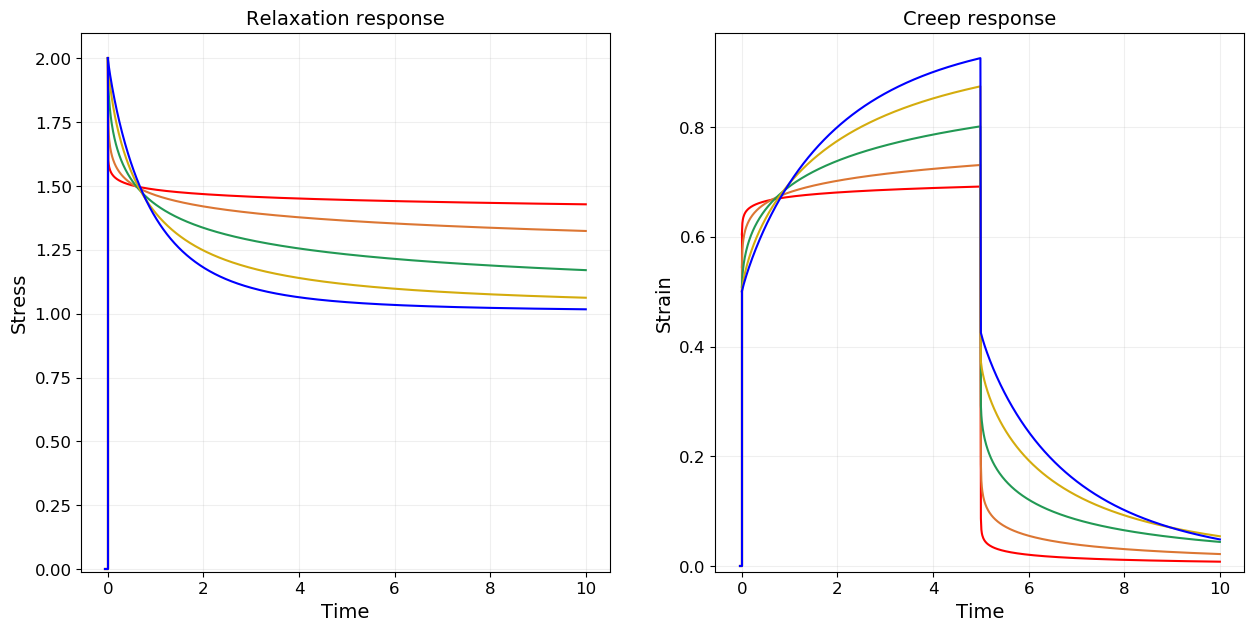

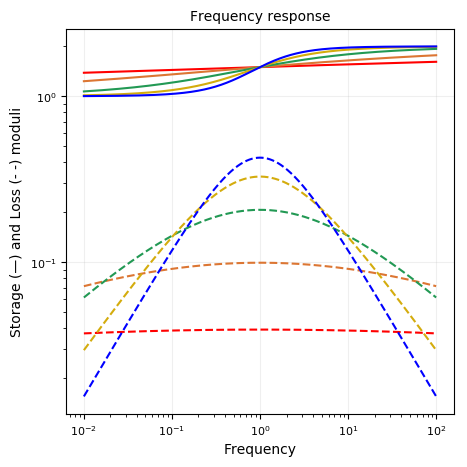

In [4]:
models = Vector{RheoModel}()

# plot moduli for varying α
for (i,α) in enumerate([0.1, 0.25, 0.5, 0.74, 0.9])
    
    models = vcat(models,RheoModel(FractionalSLS,(cₐ = 1, a = α, kᵦ = 1, kᵧ = 1)))
 
end

plotmodel(models);

## Fractional Jeffreys (Zener)

In [5]:
FractionalJeffreys


Model name: fjeff

Free parameters: ηₐ, cᵦ, β and ηᵧ


                                    ___
                            _________| |_________╱╲________
                           |        _|_|         ╲╱        |
                    _______|          ηₐ            cᵦ, β  |_______
                           |              ___              |
                           |_______________| |_____________|
                                          _|_|
                                             ηᵧ
                               

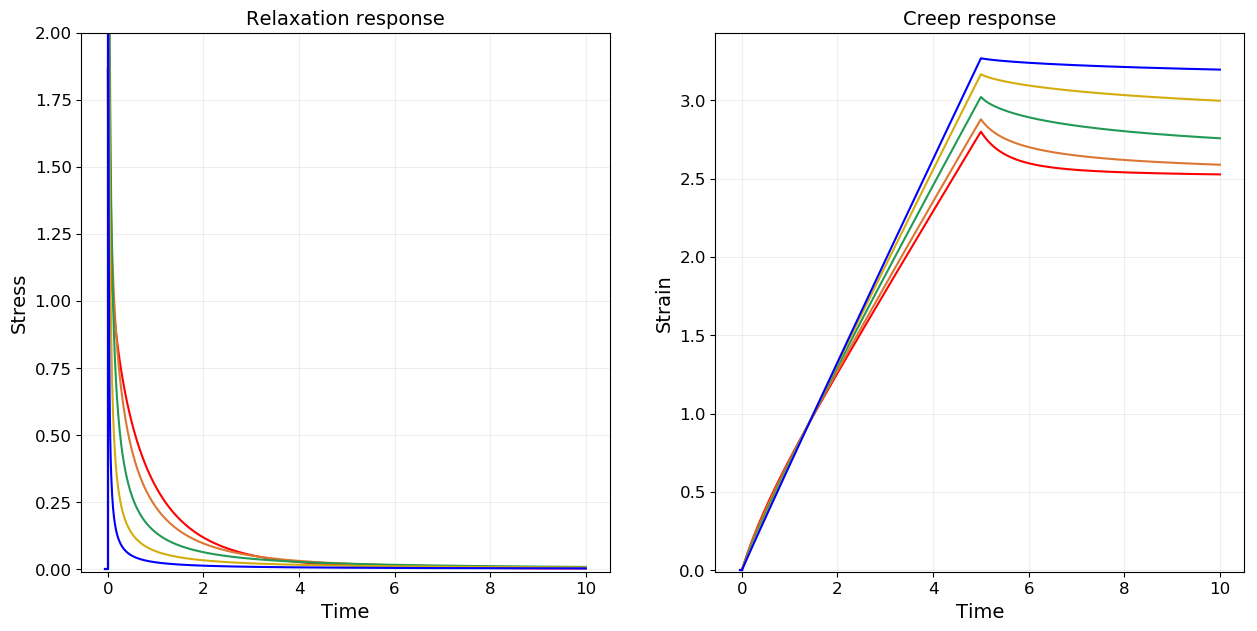

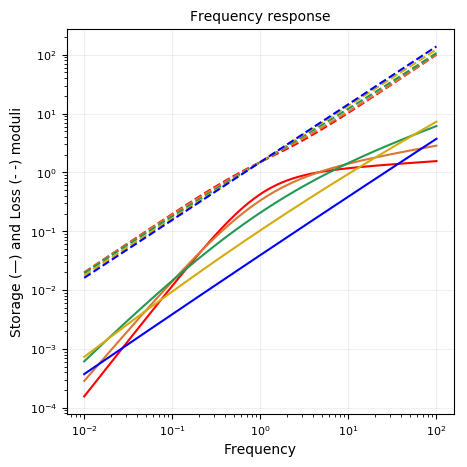

In [8]:
models = Vector{RheoModel}()

# plot moduli for varying β
for (i,β) in enumerate([0.1, 0.25, 0.5, 0.74, 0.9])
    
    models = vcat(models,RheoModel(FractionalJeffreys,(ηₐ = 1, cᵦ = 1, β = β, ηᵧ = 1)))
 
end

plotmodel(models, ymaxG = 2.0);

## Standard Linear Solid (Zener) 

In [9]:
SLS


Model name: SLS

Free parameters: η, kᵦ and kᵧ

                      ___
                  _____| |________╱╲  ╱╲  ╱╲  ___
                 |    _|_|          ╲╱  ╲╱  ╲╱   |
          _______|      η                  kᵦ    |_______
                 |                               |
                 |__________╱╲  ╱╲  ╱╲  _________|
                              ╲╱  ╲╱  ╲╱
                                   kᵧ
                     

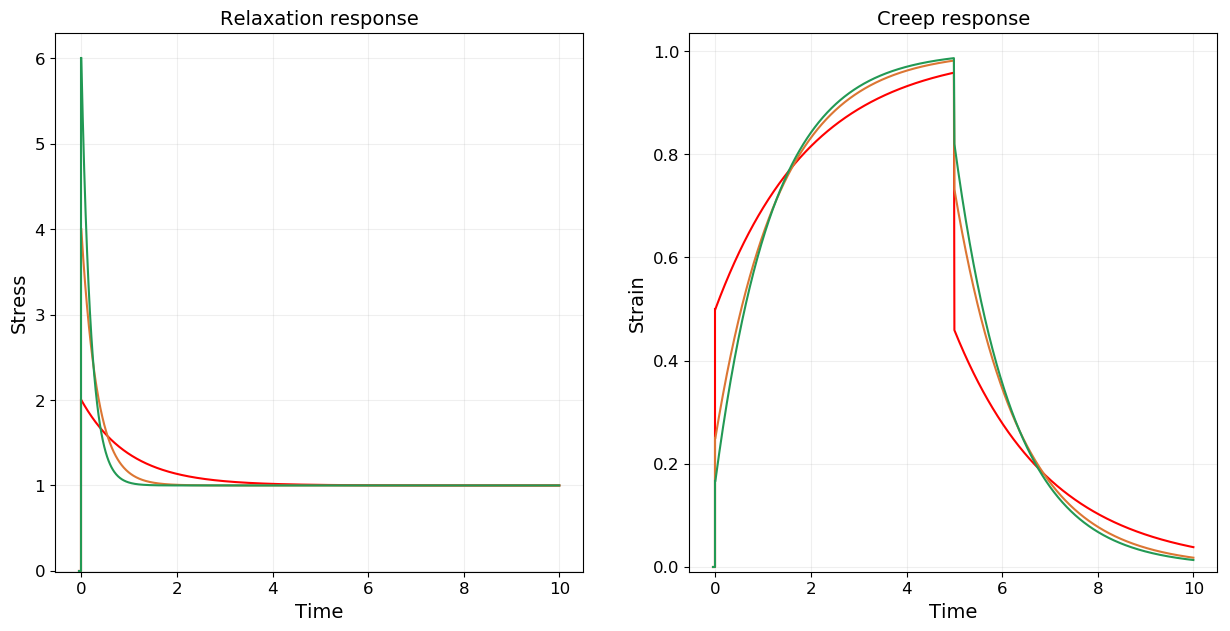

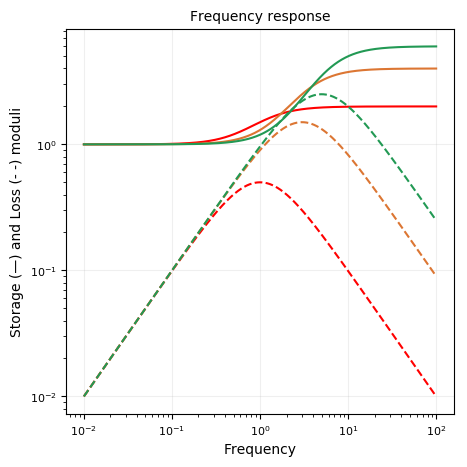

In [12]:
models = Vector{RheoModel}()

# plot moduli for varying kᵦ
for (i,k) in enumerate([1.0, 3.0, 5.0])
    
    models = vcat(models,RheoModel(SLS,(η = 1, kᵦ = k, kᵧ = 1)))
 
end

plotmodel(models);

## Jeffreys (Zener)

In [13]:
Jeffreys


Model name: jeffreys

Free parameters: ηₐ, k and ηᵧ


                              ___
                        _______| |_______╱╲  ╱╲  ╱╲  ___
                       |      _|_|         ╲╱  ╲╱  ╲╱  |
                _______|          ηₐ            k      |_______
                       |              ___              |
                       |_______________| |_____________|
                                      _|_|
                                         ηᵧ
                           

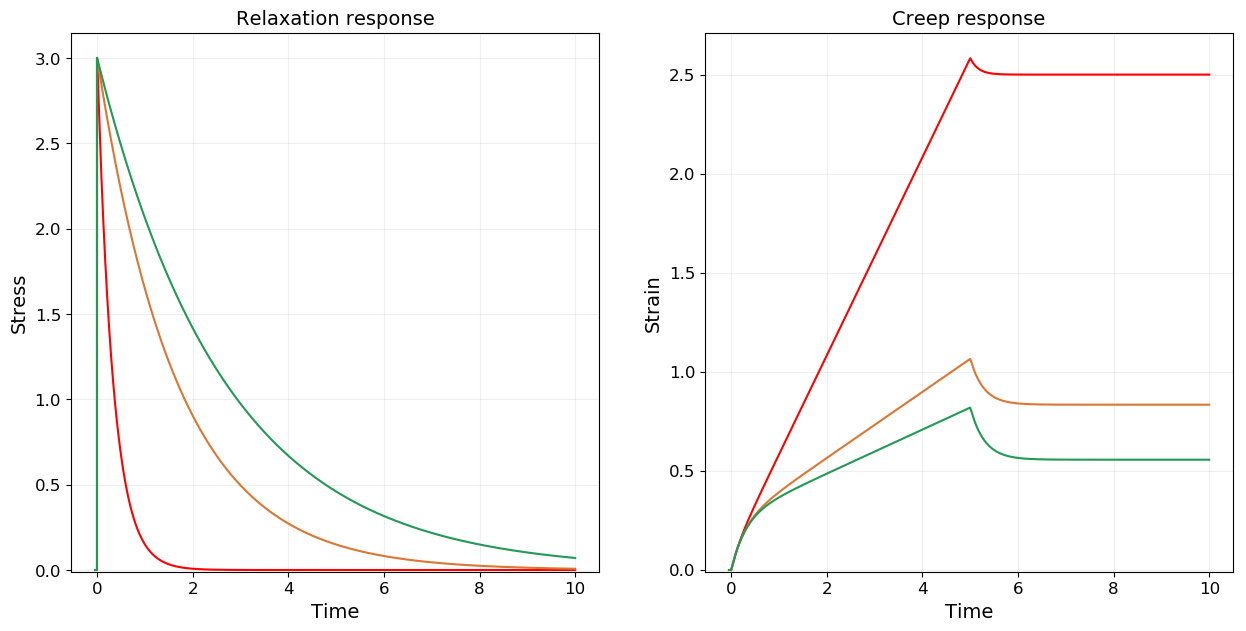

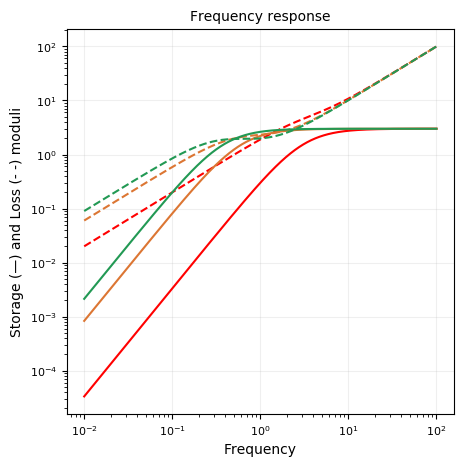

In [17]:
models = Vector{RheoModel}()

# plot moduli for varying ηₐ
for (i,η) in enumerate([1.0, 5.0, 8.0])
    
    models = vcat(models,RheoModel(Jeffreys,(ηₐ = η, k = 3, ηᵧ = 1)))
 
end

plotmodel(models);